# Examples of the commands to manipulate and plot data loaded as tplot variables

 

In [ ]:
!pip install pyspedas    ## Install the PySPEDAS module unless already have. 

## Load some datasets of the ERG satellite
12:00 UT on 26 Mar. 2017 through 12:00 UT on 27 Mar. 2017

In [ ]:
import pyspedas
import pytplot
from pytplot import tplot

tr = ['2017-03-26 12:00:00', '2017-03-27 12:00:00']
pyspedas.erg.mepe( trange=tr )
pyspedas.erg.mgf( trange=tr )
pyspedas.erg.pwe_ofa( trange=tr )
pyspedas.erg.pwe_hfa( trange=tr, level='l3' )
pyspedas.erg.orb( trange=tr )

tplot_names() gives a list containing all the tplot variables that have been saved on memory.

In [ ]:
vars = pytplot.tplot_names()

0 : erg_mepe_l2_omniflux_epoch
1 : erg_mepe_l2_omniflux_FEDO
2 : erg_mgf_l2_epoch_8sec
3 : erg_mgf_l2_mag_8sec_dsi
4 : erg_mgf_l2_mag_8sec_gse
5 : erg_mgf_l2_mag_8sec_gsm
6 : erg_mgf_l2_mag_8sec_sm
7 : erg_mgf_l2_magt_8sec
8 : erg_mgf_l2_rmsd_8sec_dsi
9 : erg_mgf_l2_rmsd_8sec_gse
10 : erg_mgf_l2_rmsd_8sec_gsm
11 : erg_mgf_l2_rmsd_8sec_sm
12 : erg_mgf_l2_rmsd_8sec
13 : erg_mgf_l2_n_rmsd_8sec
14 : erg_mgf_l2_dyn_rng_8sec
15 : erg_mgf_l2_quality_8sec
16 : erg_mgf_l2_quality_8sec_gc
17 : erg_mgf_l2_igrf_8sec_dsi
18 : erg_mgf_l2_igrf_8sec_gse
19 : erg_mgf_l2_igrf_8sec_gsm
20 : erg_mgf_l2_igrf_8sec_sm
21 : erg_pwe_ofa_l2_spec_epoch_e132
22 : erg_pwe_ofa_l2_spec_E_spectra_132
23 : erg_pwe_ofa_l2_spec_quality_flag_e132
24 : erg_pwe_ofa_l2_spec_epoch_b132
25 : erg_pwe_ofa_l2_spec_B_spectra_132
26 : erg_pwe_ofa_l2_spec_quality_flag_b132
27 : erg_pwe_hfa_l3_1min_Epoch
28 : erg_pwe_hfa_l3_1min_Fuhr
29 : erg_pwe_hfa_l3_1min_ne_mgf
30 : erg_pwe_hfa_l3_1min_quality_flag
31 : erg_orb_l2_pos_llr
32 : e

## Set the plot period

`timespan()` sets a time period for which loaded data are plotted.

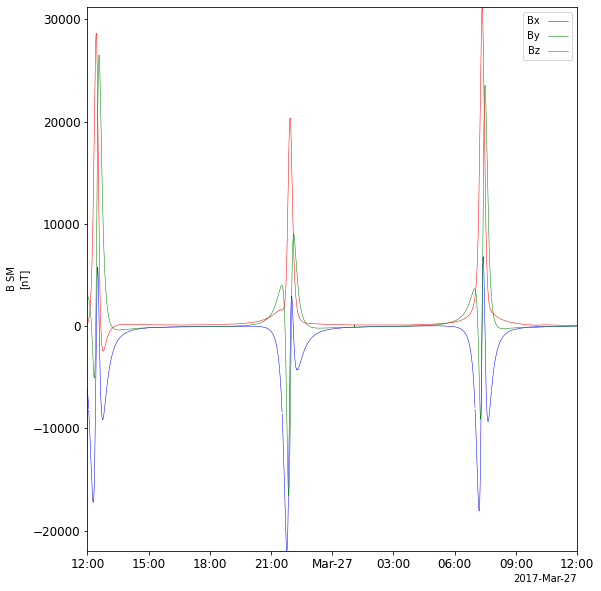

In [2]:
pytplot.timespan( tr[0], 1, keyword="days" )
tplot(['erg_mgf_l2_mag_8sec_sm'])

`timespan()` takes either of days, hours, minutes, seconds for "keyword". 
The following example sets a 3-hour plot period using "hours". 

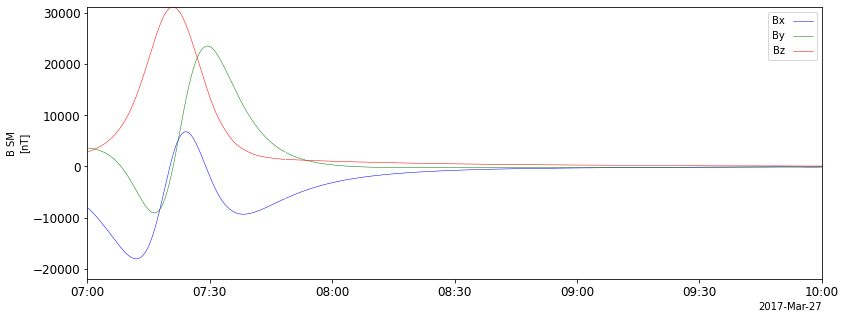

In [ ]:
pytplot.timespan( '2017-03-27 07:00:00', 3, keyword='hours')
tplot(['erg_mgf_l2_mag_8sec_sm'], xsize=12, ysize=5 )

## Add an additional x-axis

The folowing commands load the orbit data and add Lm values to the plot as an additional x-axis using "var_label" keyword. 

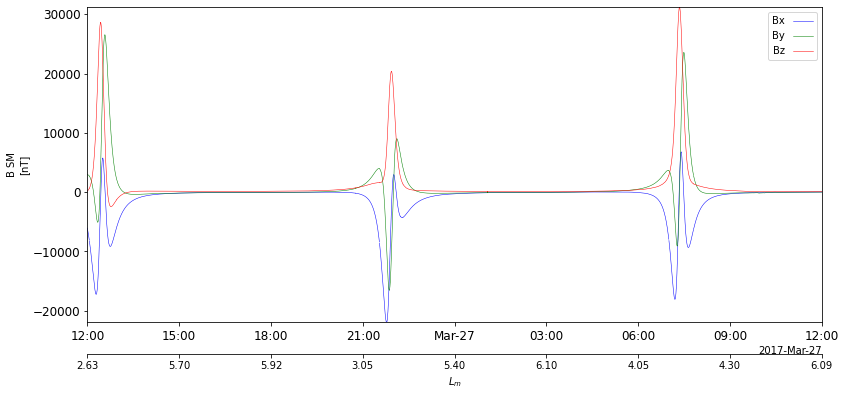

In [9]:
pytplot.split_vec( 'erg_orb_l2_pos_Lm' )
pytplot.options('erg_orb_l2_pos_Lm_x', 'ytitle', '$L_m$')
var_labels = ['erg_orb_l2_pos_Lm_x']
tplot(['erg_mgf_l2_mag_8sec_sm'], xsize=12, ysize=6, var_label=var_labels )

## Plot multiple tplot variables

`tplot()` can take an array of tplot variables to plot them all at once by stacking vertically. 

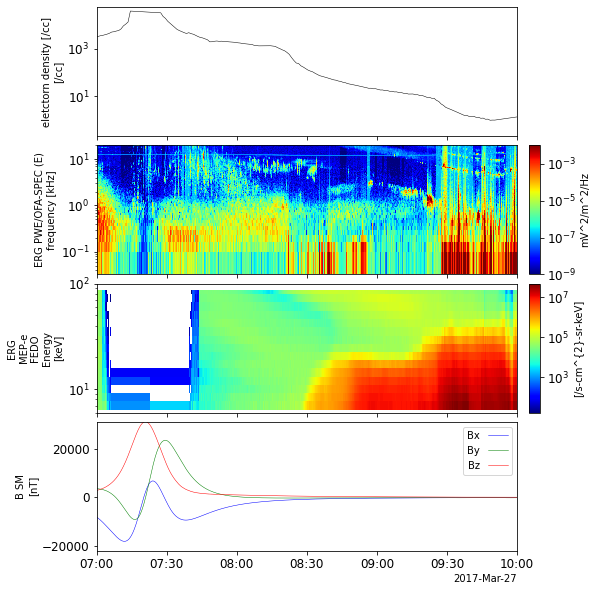

In [ ]:
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Update plot metadata

Similar to IDL/SPEDAS, you can add some "attributes" to tplot variables so that the resultant plot panels are decorated nicely. The following example changes attributes `ytitle`, `ztitle`, and `ysubtitle` to show designated labels to y-axes and color scales. Tplot() accepts the mathematical expressions of LaTex, enabling to show, for example, suffixes. 

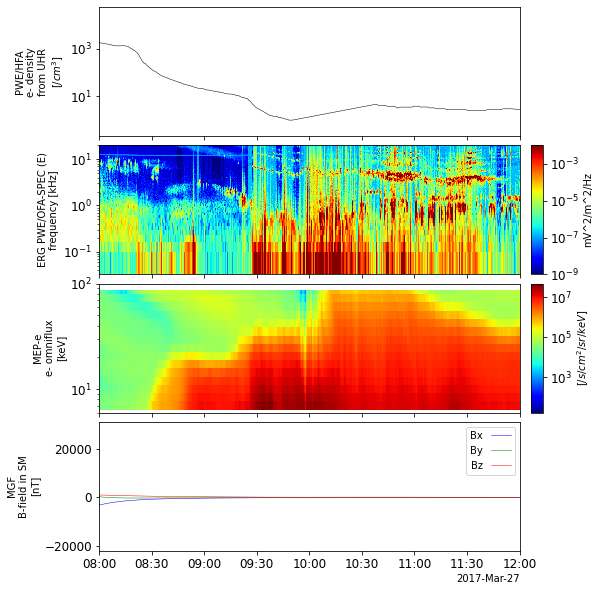

In [11]:
from pytplot import options   # As a shortcut
options('erg_mgf_l2_mag_8sec_sm', 'ytitle', 'MGF\nB-field in SM')
options('erg_mepe_l2_omniflux_FEDO', 'ytitle', 'MEP-e\ne- omniflux')
options('erg_mepe_l2_omniflux_FEDO', 'ztitle', '[$/s/cm^2/sr/keV$]')
options('erg_pwe_hfa_l3_1min_ne_mgf','ytitle', 'PWE/HFA\ne- density\nfrom UHR' )
options('erg_pwe_hfa_l3_1min_ne_mgf','ysubtitle', '[$/cm^3$]' )

pytplot.timespan( '2017-03-27 08:00:00', 4, keyword='hours')
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

If `ylog` is set to be True, a plot panel is drawn with a log-scale vertical axis. If set to be False, then the vertical axis is changed to a linear axis.  

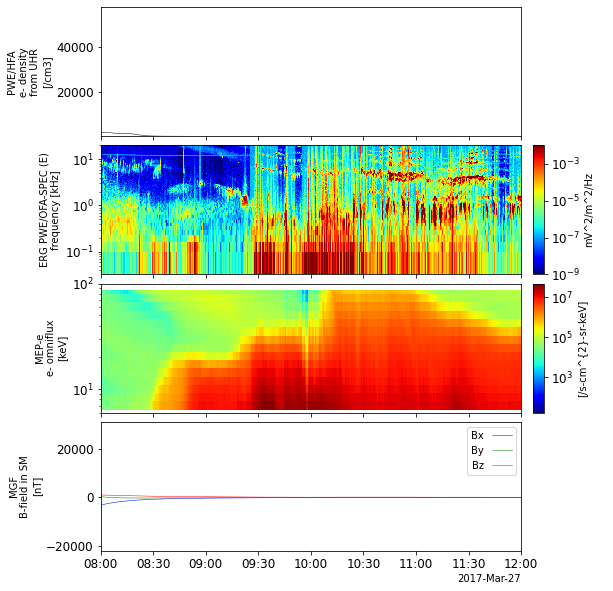

In [ ]:
options('erg_pwe_hfa_l3_1min_ne_mgf','ylog', False )  # to a linear scale
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

`yrange` attribute holds the lower and upper limits of a vertical axis. 

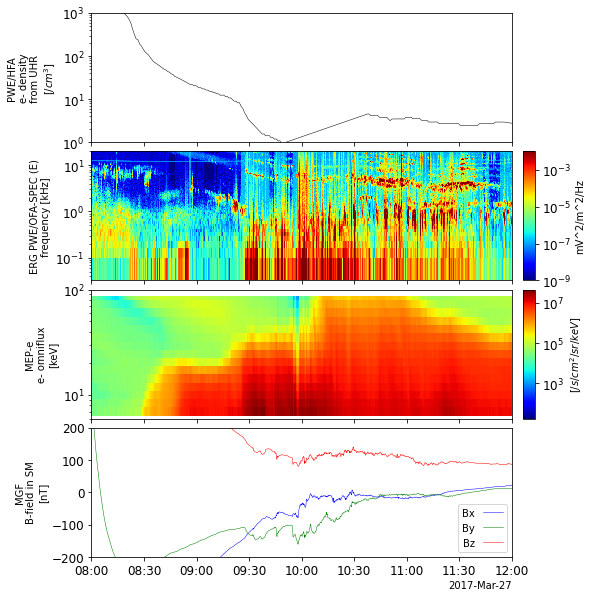

In [12]:
options('erg_pwe_hfa_l3_1min_ne_mgf','ylog', True )  # back to a log scale
options('erg_mgf_l2_mag_8sec_sm', 'yrange', [-200,200])
options('erg_pwe_hfa_l3_1min_ne_mgf', 'yrange', [1e0,1e3])
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

### Change the color bar
You can choose any of the colormaps available for matplotlib. See the website below for a list:
https://matplotlib.org/3.6.0/tutorials/colors/colormaps.html

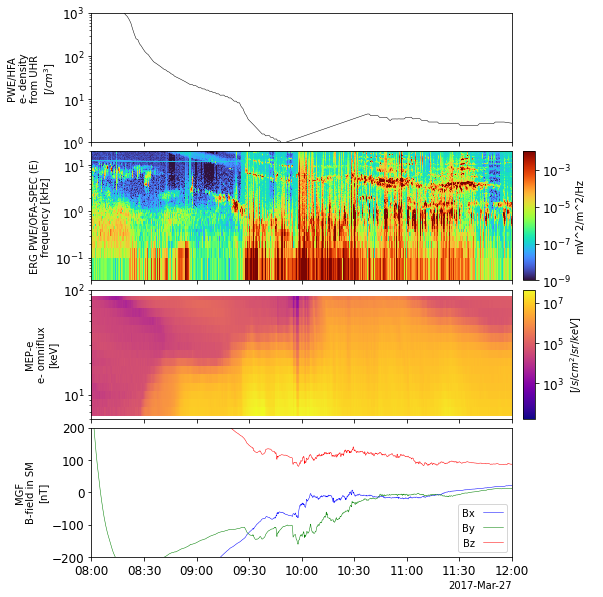

In [13]:
options('erg_mepe_l2_omniflux_FEDO', 'Colormap', 'plasma' )
options('erg_pwe_ofa_l2_spec_E_spectra_132', 'Colormap', 'turbo' )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

Setting `zrange` changes the color scale range for spectrum-type plots. 

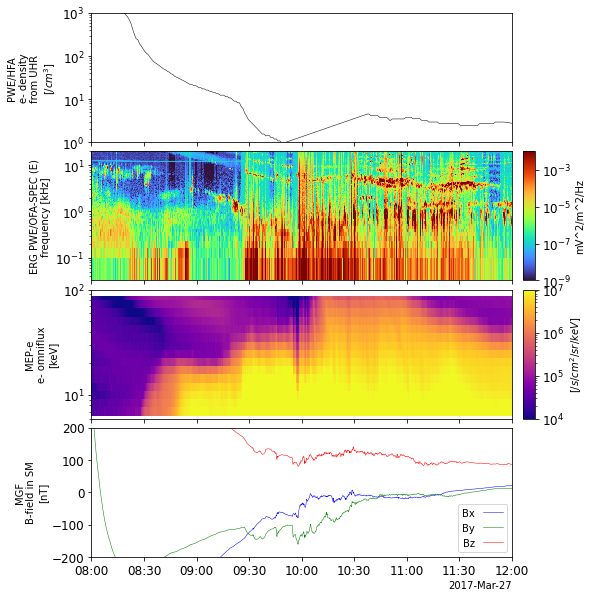

In [14]:
options('erg_mepe_l2_omniflux_FEDO', 'zrange', [1e4,1e7] )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

You can create a semi-tranparent plot panel by setting `alpha` attribute. 


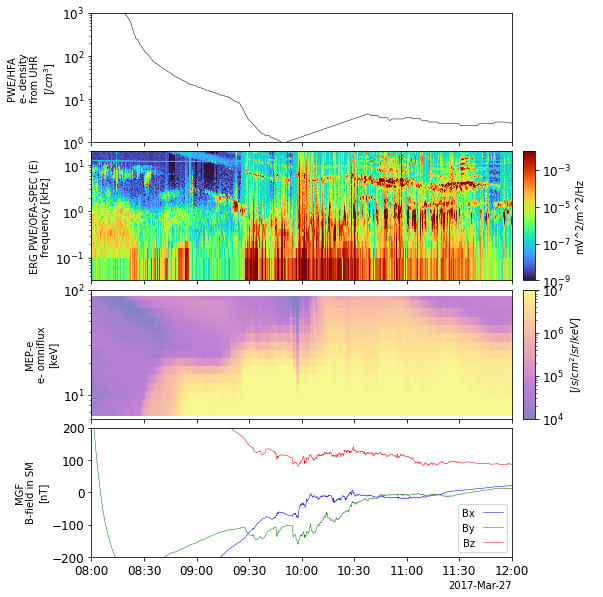

In [15]:
options('erg_mepe_l2_omniflux_FEDO', 'alpha', 0.5 )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

By setting `marker` attribute to a character, you can put that character at all plot values.  

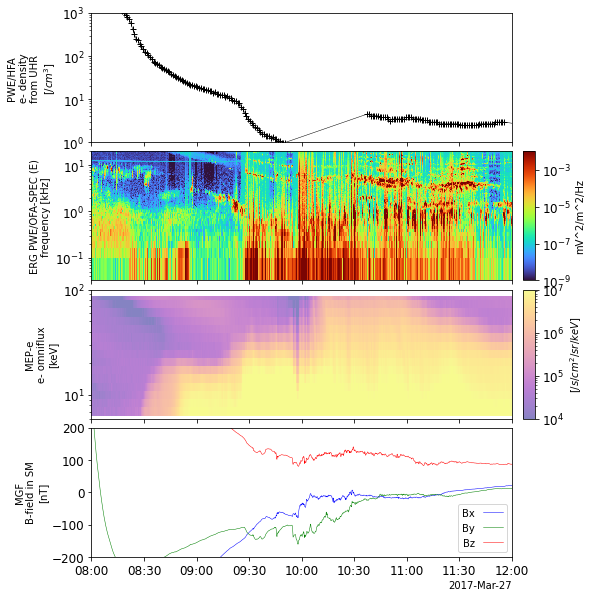

In [16]:
options('erg_pwe_hfa_l3_1min_ne_mgf', 'marker', '+')
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Overplot lines on spectra

You can overlay lines over a spectrum-type plot by creating a **combined tplot variable**. 

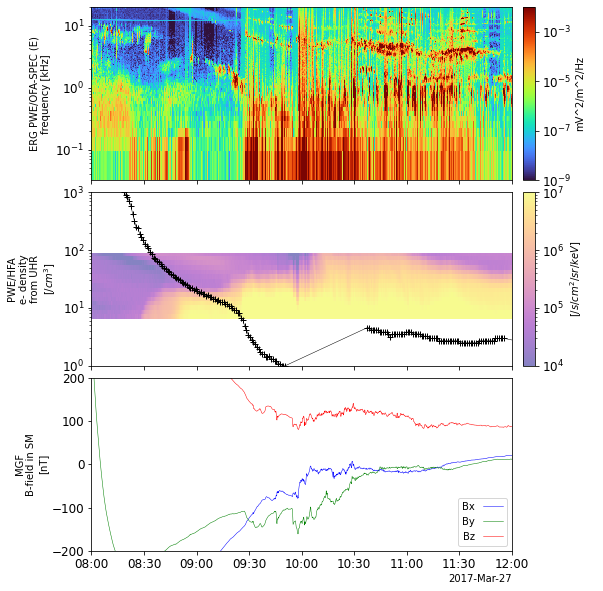

In [17]:
pytplot.store_data('mepe_hfa_combined', data='erg_mepe_l2_omniflux_FEDO erg_pwe_hfa_l3_1min_ne_mgf')
tplot(['erg_pwe_ofa_l2_spec_E_spectra_132','mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'])

The combined panel looks awkward. The following commands improve the panel by drawing the two y-axes separately. 

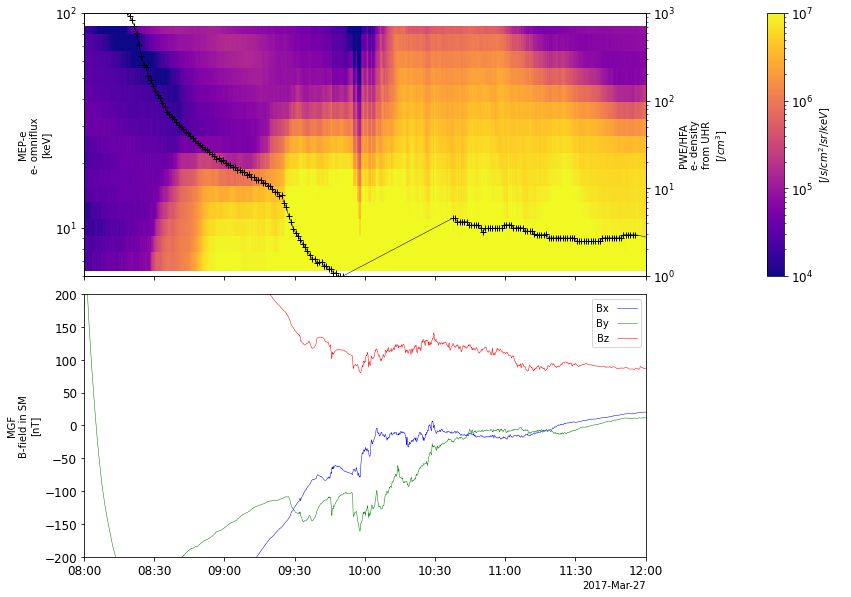

In [38]:
options('erg_mepe_l2_omniflux_FEDO', 'alpha',1.0)
options('mepe_hfa_combined', 'right_axis', True)
from pytplot import tplot_options
tplot_options('xmargin', [0.1, 0.25])    ## Default: [0.1, 0.05]
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)

## Add legends to a plot panel and chage the color of a line plot

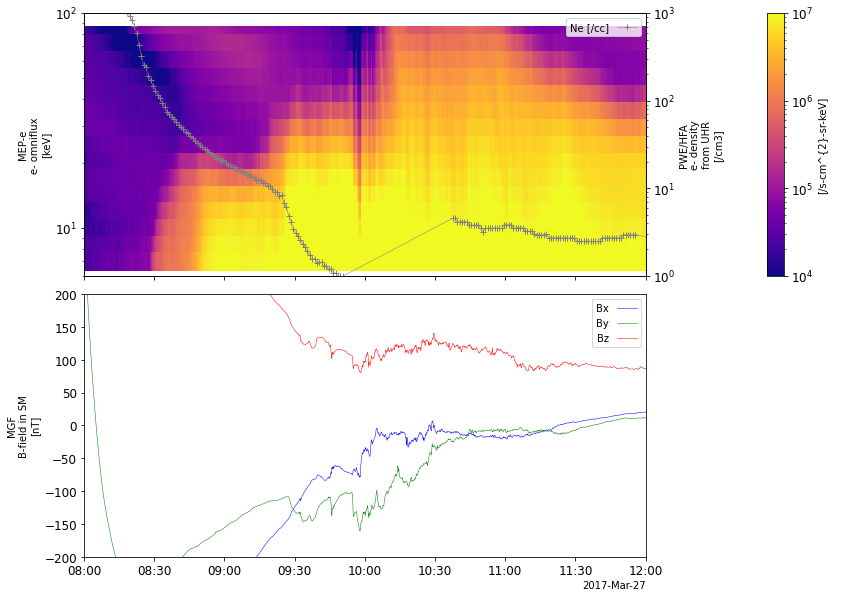

In [ ]:
options('erg_pwe_hfa_l3_1min_ne_mgf','legend_names', 'Ne [/cc]')
options('erg_pwe_hfa_l3_1min_ne_mgf','color', 'grey')
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)

## Add a plot title to a figure

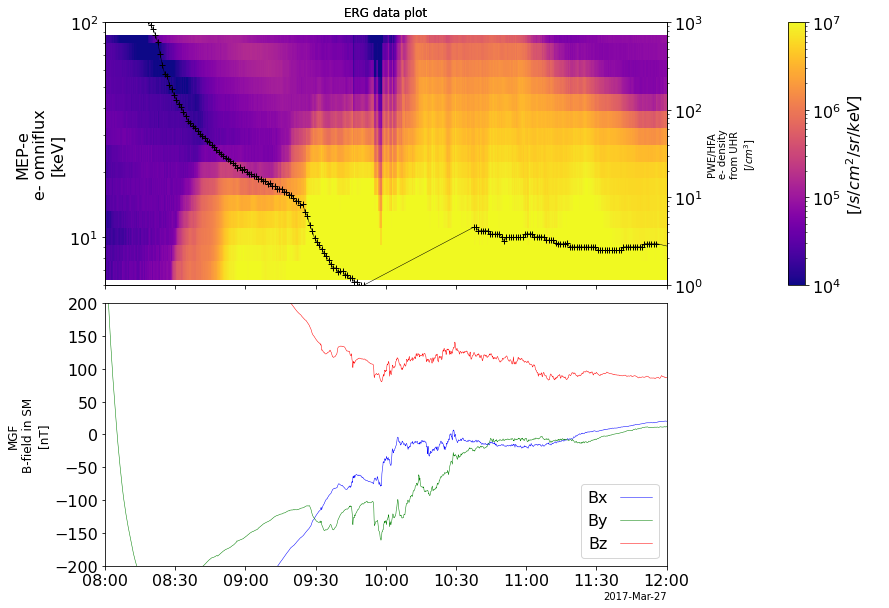

In [72]:
pytplot.tplot_options('title', 'ERG data plot')
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)

# Apply various filters to time series data
The pyspedas module provides some methods with which you can calculate boxcar-average, running-average of a given data. 

## Calculate boxcar agerages of data
`avg_data()` calculates boxcar averages with a given time width. The following command derives a boxcar average of data for each 64 s period.

avg_data was applied to: erg_mgf_l2_mag_8sec_sm-avg


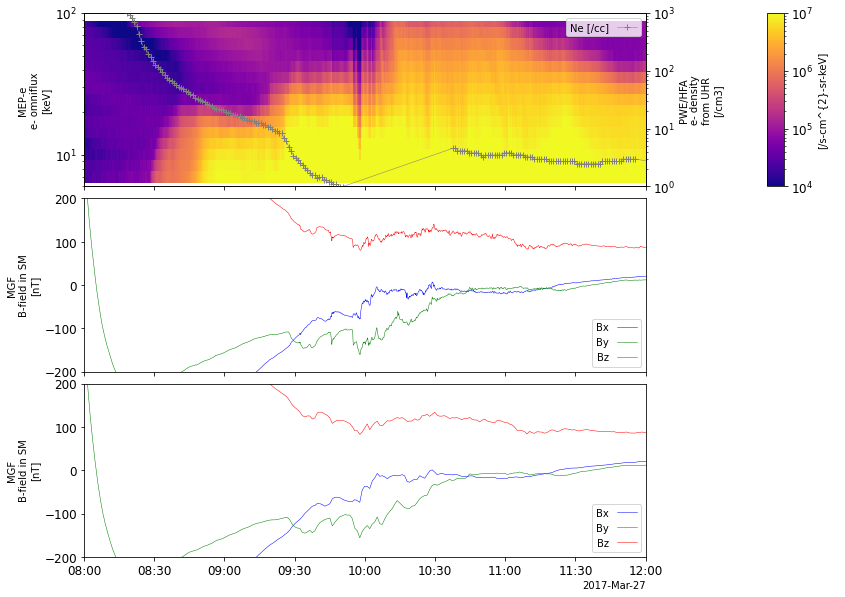

In [ ]:
pyspedas.avg_data('erg_mgf_l2_mag_8sec_sm', 64)
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-avg'], xsize=12)

## Running average
`tsmooth()` calculates time-averages with a sliding window having a width in data point given as `width` keyword. 

The following example essentially derived a low-pass filtered time series from the original data. 

erg_mgf_l2_mag_8sec_sm copied to erg_mgf_l2_mag_8sec_sm-s
tsmooth was applied to: erg_mgf_l2_mag_8sec_sm-s


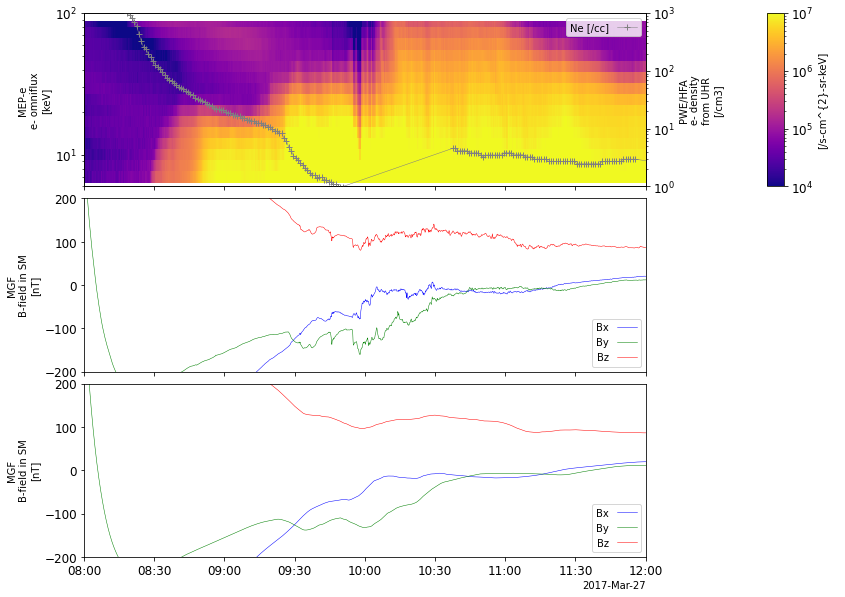

In [ ]:
## The MGF Lv.2 8 s data has 8-s values. "width=8*10" means that it calculates the running average with a time window of ~8 s * 8 * 10 = 640 s. 
pyspedas.tsmooth( 'erg_mgf_l2_mag_8sec_sm', width=8*10)  
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s'], xsize=12)

## Generate a high-pass-filtered data

`tplot_math.subtract()` create a new tplot variable containing the difference between one tplot variable and another. By subtracting a low-pass-filtered time series from the original data, you can derive a essentially high-pass-filtered time series. 


`tplot_math` has many submodules that carry out various mathematical calculations of tplot variables. The list of the submodules is available at https://pytplot.readthedocs.io/en/latest/math_routines.html. 

In [ ]:
pytplot.tplot_math.subtract( 'erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s', 'erg_mgf_hpf_640s')


'erg_mgf_hpf_640s'

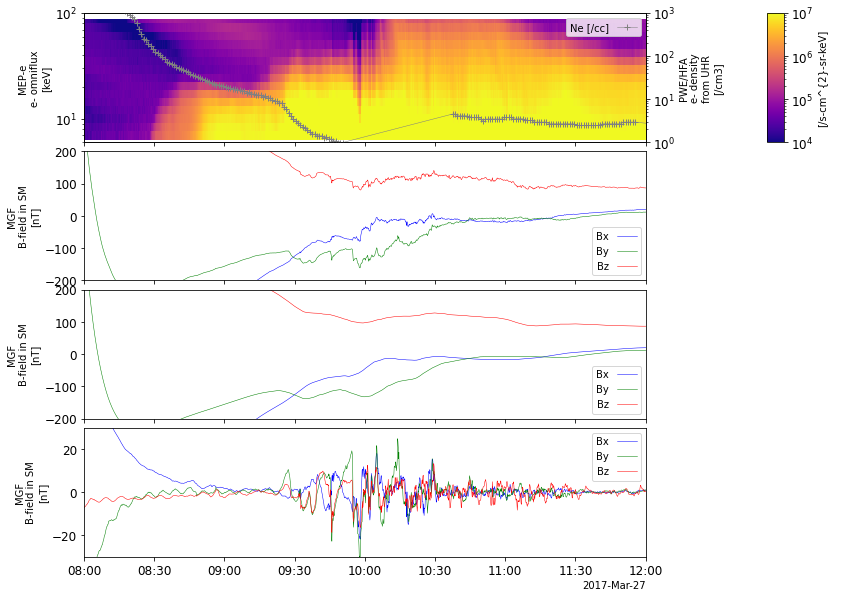

In [ ]:
options('erg_mgf_hpf_640s', 'yrange', [-30, 30])
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s','erg_mgf_hpf_640s'], xsize=12)

### Separate a tplot variable containing vector values into that of each component
For this purpose, you can use `split_vec()`. 

`join_vec()` has the opposite functionality: it combines multiple tplot variables containing scalar values into a single variable with the vector values. 

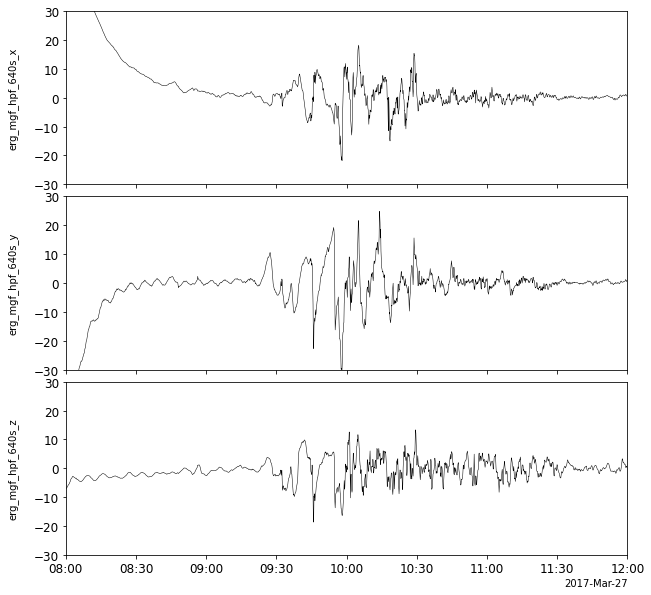

In [ ]:
vars = pytplot.split_vec('erg_mgf_hpf_640s')
options( vars, 'yrange', [-30,30])
tplot( vars, xsize=12 )

`char_size` attribute sets the size of characters written axis labels. Larger numbers mean larger sizes. 

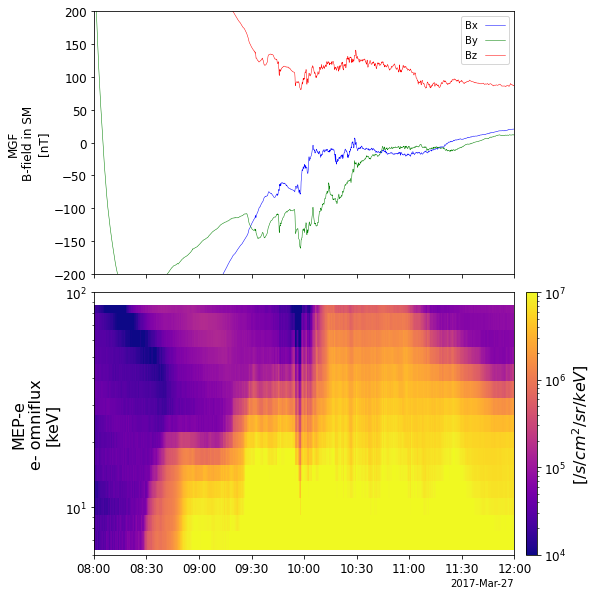

In [58]:
options('erg_mepe_l2_omniflux_FEDO','char_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

`axis_font_size` attribute sets the size of characters put along axes. 


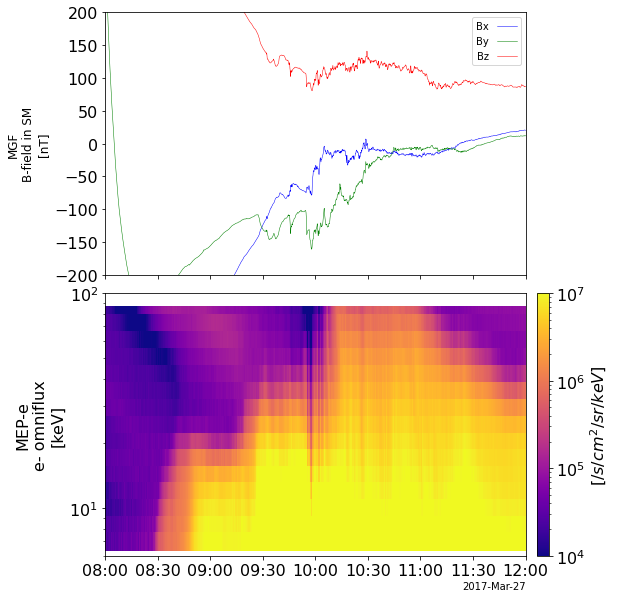

In [59]:
pytplot.tplot_options('axis_font_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

Similar to char_size and axis_font_size, `legend_size` sets the character size for legends. 

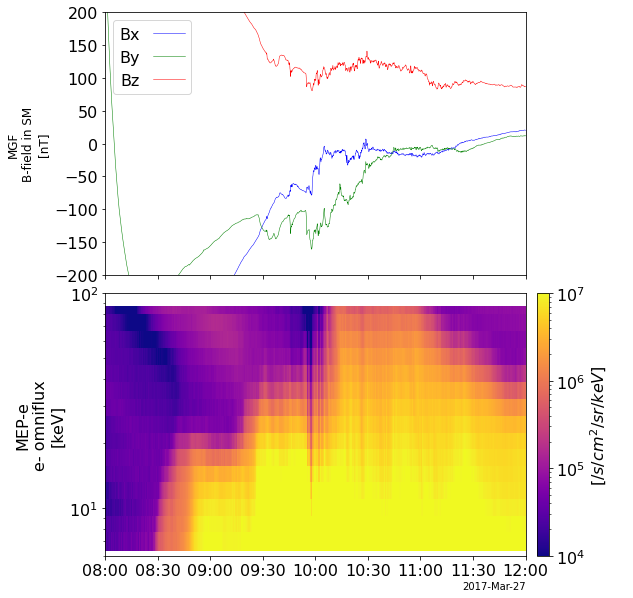

In [60]:
options('erg_mgf_l2_mag_8sec_sm', 'legend_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

By setting `legend_location`, you can draw legends on the right side of a plot, or at an appropriate place in a plot panel. 

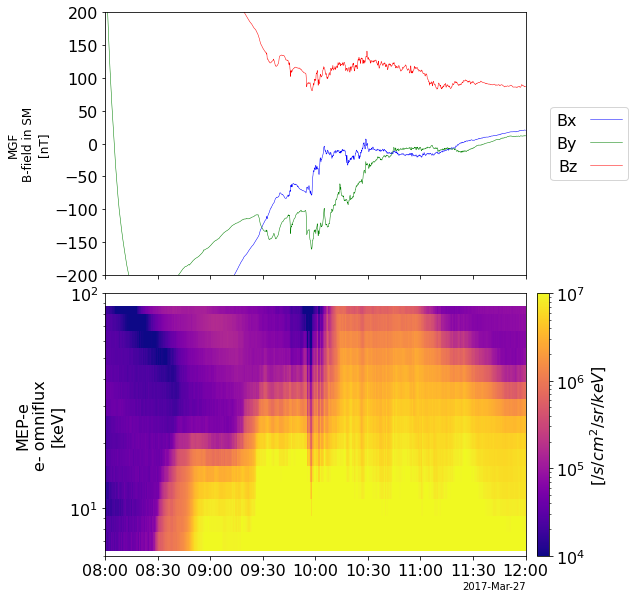

In [70]:
options('erg_mgf_l2_mag_8sec_sm', 'legend_location', 'spedas')
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

options('erg_mgf_l2_mag_8sec_sm', 'legend_location', 'best')  ## automatically located inside a plot panel. 

## Save a plot in picture files. 

Using `save_png` keyword, you can save a plot in a PNG file. 

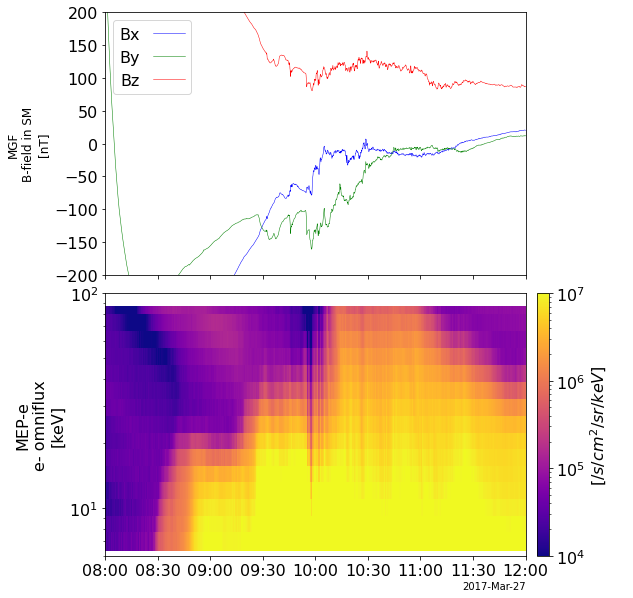

In [71]:
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'], save_png='mgf_mepe_plot')
# tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'], save_pdf='mgf_mepe_plot')  ## It works, but the resultant PDF is too big in file size. 



---


# The internal structure of tplot variables


`get_data()` returns a taple containing an array of time labels and that of data in a tplot variable. Each element of the taple is a numpy array. 


Basically the entire data and attributes of a tplot variable is held on memory as a Xarray DataArray object. By setting `xarray` keyword to True in get_data(), you can obtain the Xarray object of a tplot variable. 


In [ ]:
tvar = pytplot.get_data('erg_mgf_l2_mag_8sec_sm')
tvar
#time, data = pytplot.get_data('erg_mgf_l2_mag_8sec_sm')
#time, data


variable(times=array([1.49048640e+09, 1.49048640e+09, 1.49048641e+09, ...,
       1.49065917e+09, 1.49065918e+09, 1.49065919e+09]), y=array([[ -4.84148645, -27.20098906, 174.16721801],
       [ -4.88376561, -26.82811983, 174.52345086],
       [ -4.82077771, -26.69901797, 174.68817152],
       ...,
       [  5.25403743,  19.34393316, 208.26594567],
       [  5.31039019,  19.57694809, 208.47570839],
       [  5.35093915,  19.81316376, 208.86482972]]))

In [ ]:
xr = pytplot.get_data('erg_mgf_l2_mag_8sec_sm', xarray=True)
xr

<xarray.DataArray 'erg_mgf_l2_mag_8sec_sm' (time: 21624, v_dim: 3)>
array([[ -4.84148645, -27.20098906, 174.16721801],
       [ -4.88376561, -26.82811983, 174.52345086],
       [ -4.82077771, -26.69901797, 174.68817152],
       ...,
       [  5.25403743,  19.34393316, 208.26594567],
       [  5.31039019,  19.57694809, 208.47570839],
       [  5.35093915,  19.81316376, 208.86482972]])
Coordinates:
  * time     (time) float64 1.49e+09 1.49e+09 1.49e+09 ... 1.491e+09 1.491e+09
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'B in SM', 'CATDESC': '8 sec resolut...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...